# Quickstart


First, ensure your environment contains:
* dask-image
* python-graphviz
* scikit-image
* matplotlib
* numpy

Next, import dask-image.

In [67]:
import dask_image
import dask.array as da

We'll also use matplotlib to display image results in this guide.

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline

## Reading in image data

We'll use some example image data from the scikit-image library in this tutorial. These images are very small, but will allow us to demonstrate the functionality of dask-image.

### Reading a single image

Let's load a public domain image of the astronaut Eileen Collins with dask-image [imread()](http://image.dask.org/en/latest/dask_image.imread.html). This image was originally downloaded from the NASA Great Images database <https://flic.kr/p/r9qvLn>.

dask.array<from-value, shape=(1, 512, 512, 3), dtype=uint8, chunksize=(1, 512, 512, 3)>


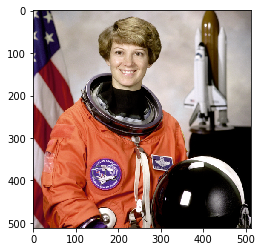

In [81]:
filename = 'img/astronaut.png'
astronaut = dask_image.imread.imread(filename)
print(astronaut)
plt.imshow(astronaut[0, ...])  # display the first (and only) frame of the image

This has created a dask array with `shape=(1, 512, 512, 3)`. This means it contains one image frame with 512 rows, 512 columns, and 3 color channels. 
 
Since the image is relatively small, it fits entirely within one dask-image chunk, with `chunksize=(1, 512, 512, 3)`.


### Reading multiple images

In many cases, you may have multiple images stored on disk, for example:
`image_00.png`, `image_01.png`, ... `image_NN.png`. These can be read into a dask array as multiple image frames.

Here we have the astronaut image split into four non-overlapping tiles:
* `image_00.png` = top left image (index 0,0)
* `image_01.png` = top right image (index 0,1)
* `image_10.png` = bottom left image (index 1,0)
* `image_11.png` = bottom right image (index 1,1)

This filename pattern can be matched with regex: `image-*.png`

In [86]:
filename_pattern = 'img/astronaut/tiles/image-*.png'
tiled_astronaut_images = dask_image.imread.imread(filename_pattern)
print(tiled_astronaut_images)

dask.array<concatenate, shape=(4, 256, 256, 3), dtype=uint8, chunksize=(1, 256, 256, 3)>


This has created a dask array with `shape=(4, 256, 256, 3)`. This means it contains four image frames; each with 256 rows, 256 columns, and 3 color channels. 

There are four chunks in this particular case. Each image frame here is a separate chunk with `chunksize=(1, 256, 256, 3)`.

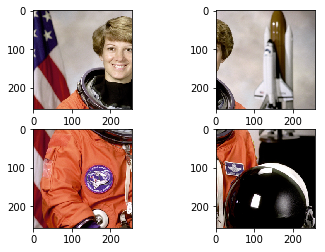

In [95]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0,0].imshow(tiled_astronaut_images[0])
ax[0,1].imshow(tiled_astronaut_images[1])
ax[1,0].imshow(tiled_astronaut_images[2])
ax[1,1].imshow(tiled_astronaut_images[3])
plt.show()

## Applying a function


[scikit-image rgb2grey](http://scikit-image.org/docs/dev/api/skimage.color.html#skimage.color.rgb2grey)


In [10]:
def grayscale(rgb):
    result = ((rgb[..., 0] * 0.2125) + 
              (rgb[..., 1] * 0.7154) + 
              (rgb[..., 2] * 0.0721))
    return result

(512, 512)


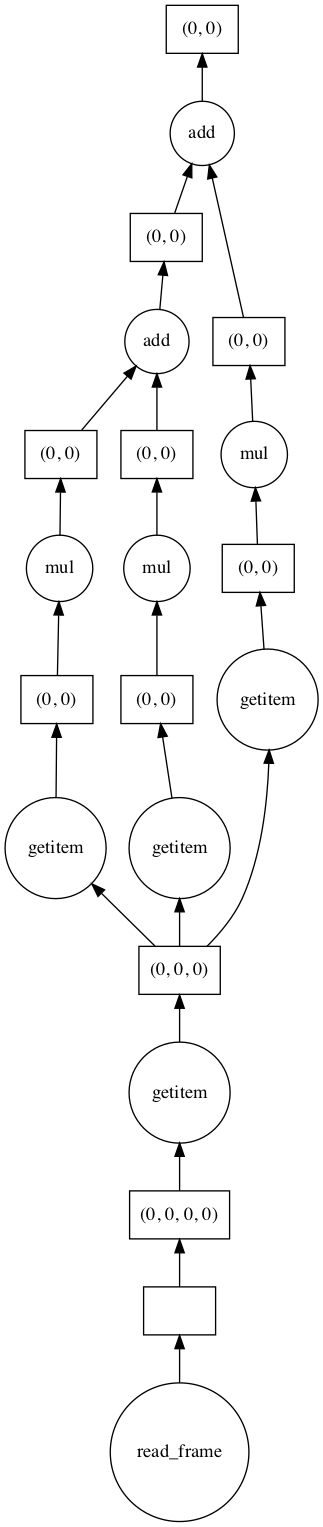

In [11]:
result = grayscale(img)
print(result.shape)
result.visualize()

(512, 512, 3)


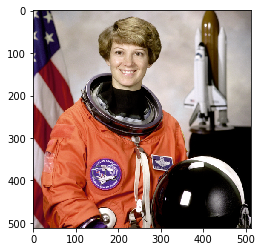

In [12]:
print(img.shape)
plt.imshow(img)

(512, 512)


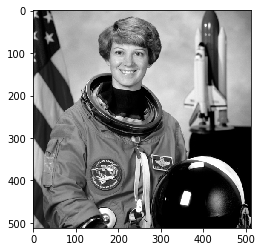

In [13]:
print(result.shape)
plt.imshow(result, cmap='gray')

(4, 256, 256)


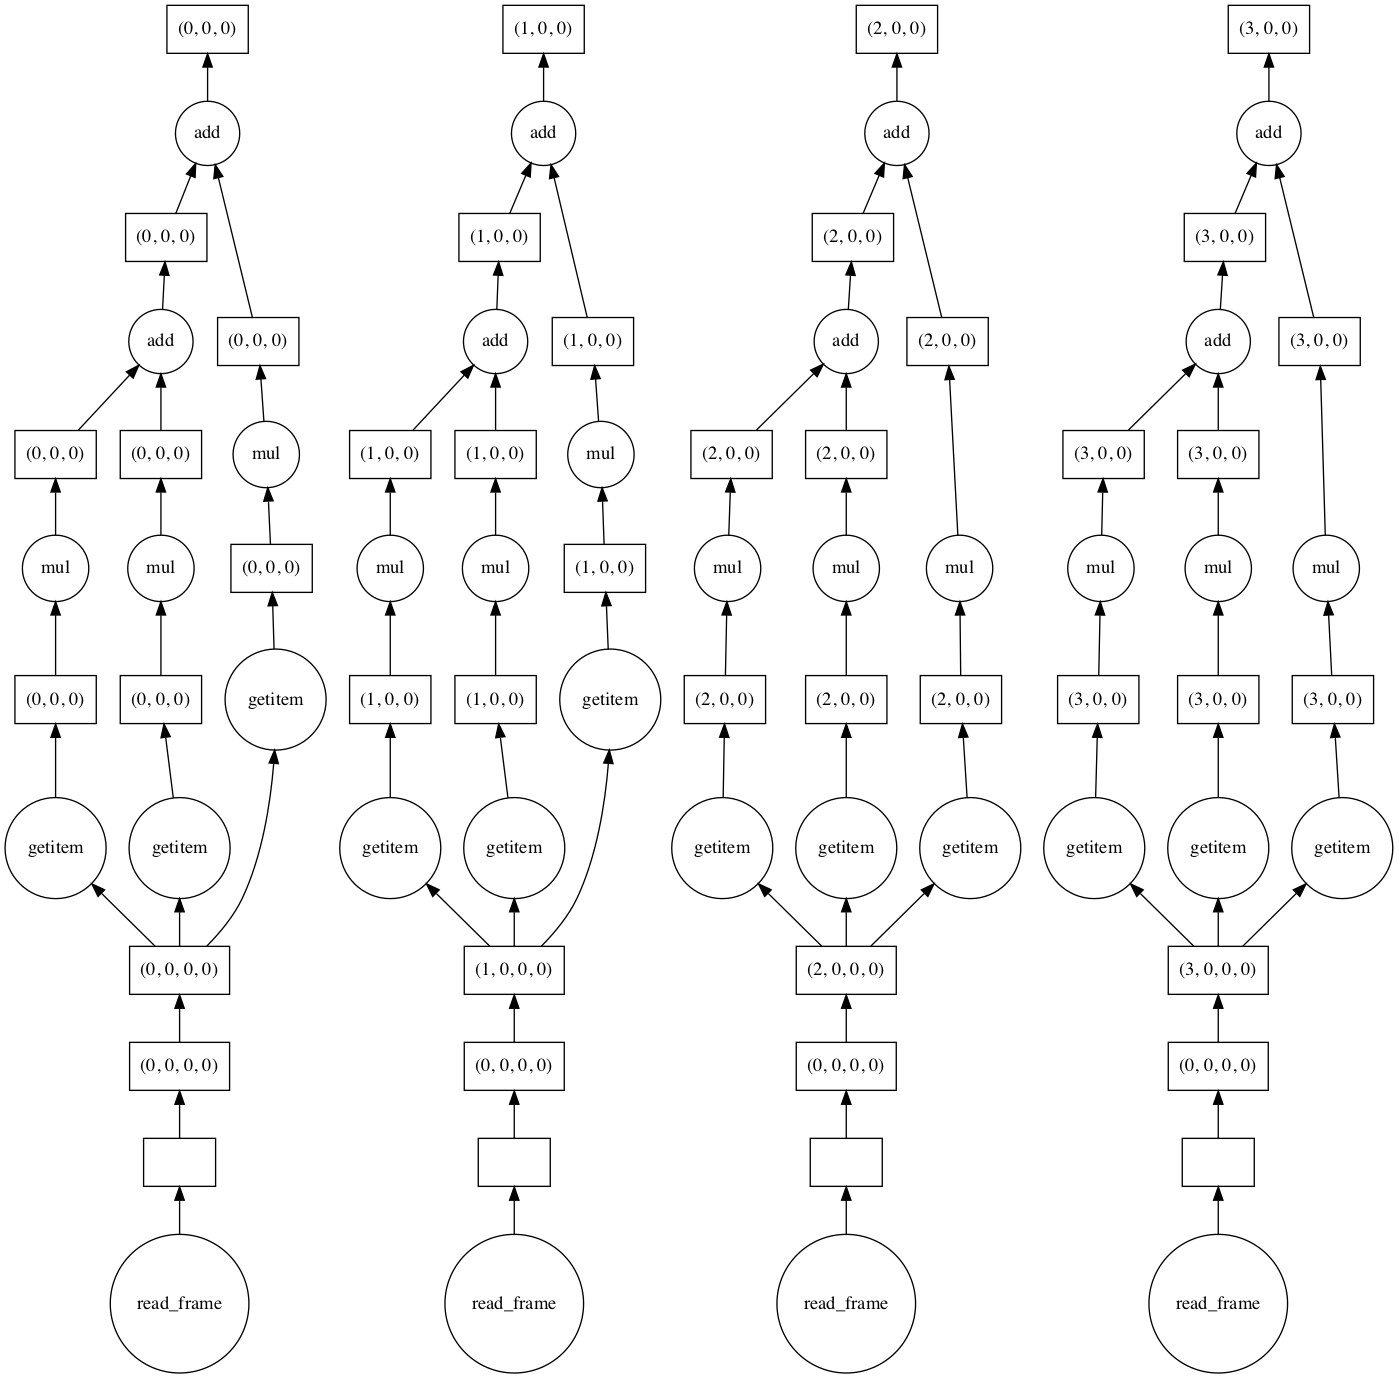

In [14]:
result2 = grayscale(imgs)
print(result2.shape)
result2.visualize()

In [15]:
# io.imsave('img/astronaut_grey_tiles/astronaut-00.tif', result2[0, ...])
# io.imsave('img/astronaut_grey_tiles/astronaut-01.tif', result2[1, ...])
# io.imsave('img/astronaut_grey_tiles/astronaut-10.tif', result2[2, ...])
# io.imsave('img/astronaut_grey_tiles/astronaut-11.tif', result2[3, ...])

# !ls img/astronaut_grey_tiles/

In [16]:
gray_filenames = 'img/astronaut_grey_tiles/astronaut-*.tif'
gray_imgs = dask_image.imread.imread(gray_filenames)
gray_imgs

dask.array<concatenate, shape=(4, 256, 256), dtype=float64, chunksize=(1, 256, 256)>

http://docs.dask.org/en/latest/array-stack.html

In [17]:
import dask.array as da
import numpy as np

arr0 = da.from_array(np.zeros((3, 4)), chunks=(1, 2))
arr1 = da.from_array(np.ones((3, 4)), chunks=(1, 2))

data = [[arr0, arr1],
        [arr1, arr0]]

x = da.block(data)
x.shape  # expect (6, 8)

(6, 8)

In [29]:
imgs

dask.array<concatenate, shape=(4, 256, 256, 3), dtype=uint8, chunksize=(1, 256, 256, 3)>

In [36]:
data

[[dask.array<getitem, shape=(256, 256, 3), dtype=uint8, chunksize=(256, 256, 3)>,
  dask.array<getitem, shape=(256, 256, 3), dtype=uint8, chunksize=(256, 256, 3)>],
 [dask.array<getitem, shape=(256, 256, 3), dtype=uint8, chunksize=(256, 256, 3)>,
  dask.array<getitem, shape=(256, 256, 3), dtype=uint8, chunksize=(256, 256, 3)>]]

(512, 512, 3)


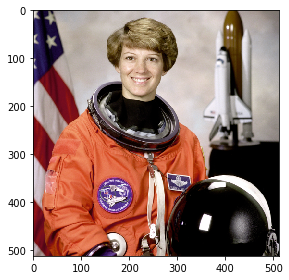

In [38]:
data = [[[imgs[0, ...]], [imgs[1, ...]]],
        [[imgs[2, ...]], [imgs[3, ...]]]]
blocks = da.block(data)
print(blocks.shape)
io.imshow(blocks)

dask.array<getitem, shape=(512, 512, 3), dtype=uint8, chunksize=(512, 512, 3)>
(512, 512, 3)


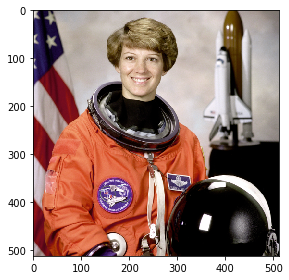

In [27]:
print(img)
print(img.shape)
io.imshow(img)

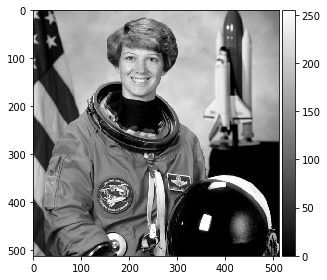

In [48]:
data = [[gray_imgs[0, ...], gray_imgs[1, ...]],
        [gray_imgs[2, ...], gray_imgs[3, ...]]]
blocks = da.block(data)
io.imshow(blocks, cmap='gray')

In [40]:
blocks

dask.array<concatenate, shape=(512, 512), dtype=float64, chunksize=(256, 256)>

In [42]:
gray_imgs_gauss = dask_image.ndfilters.gaussian_filter(blocks, sigma=[10, 10])


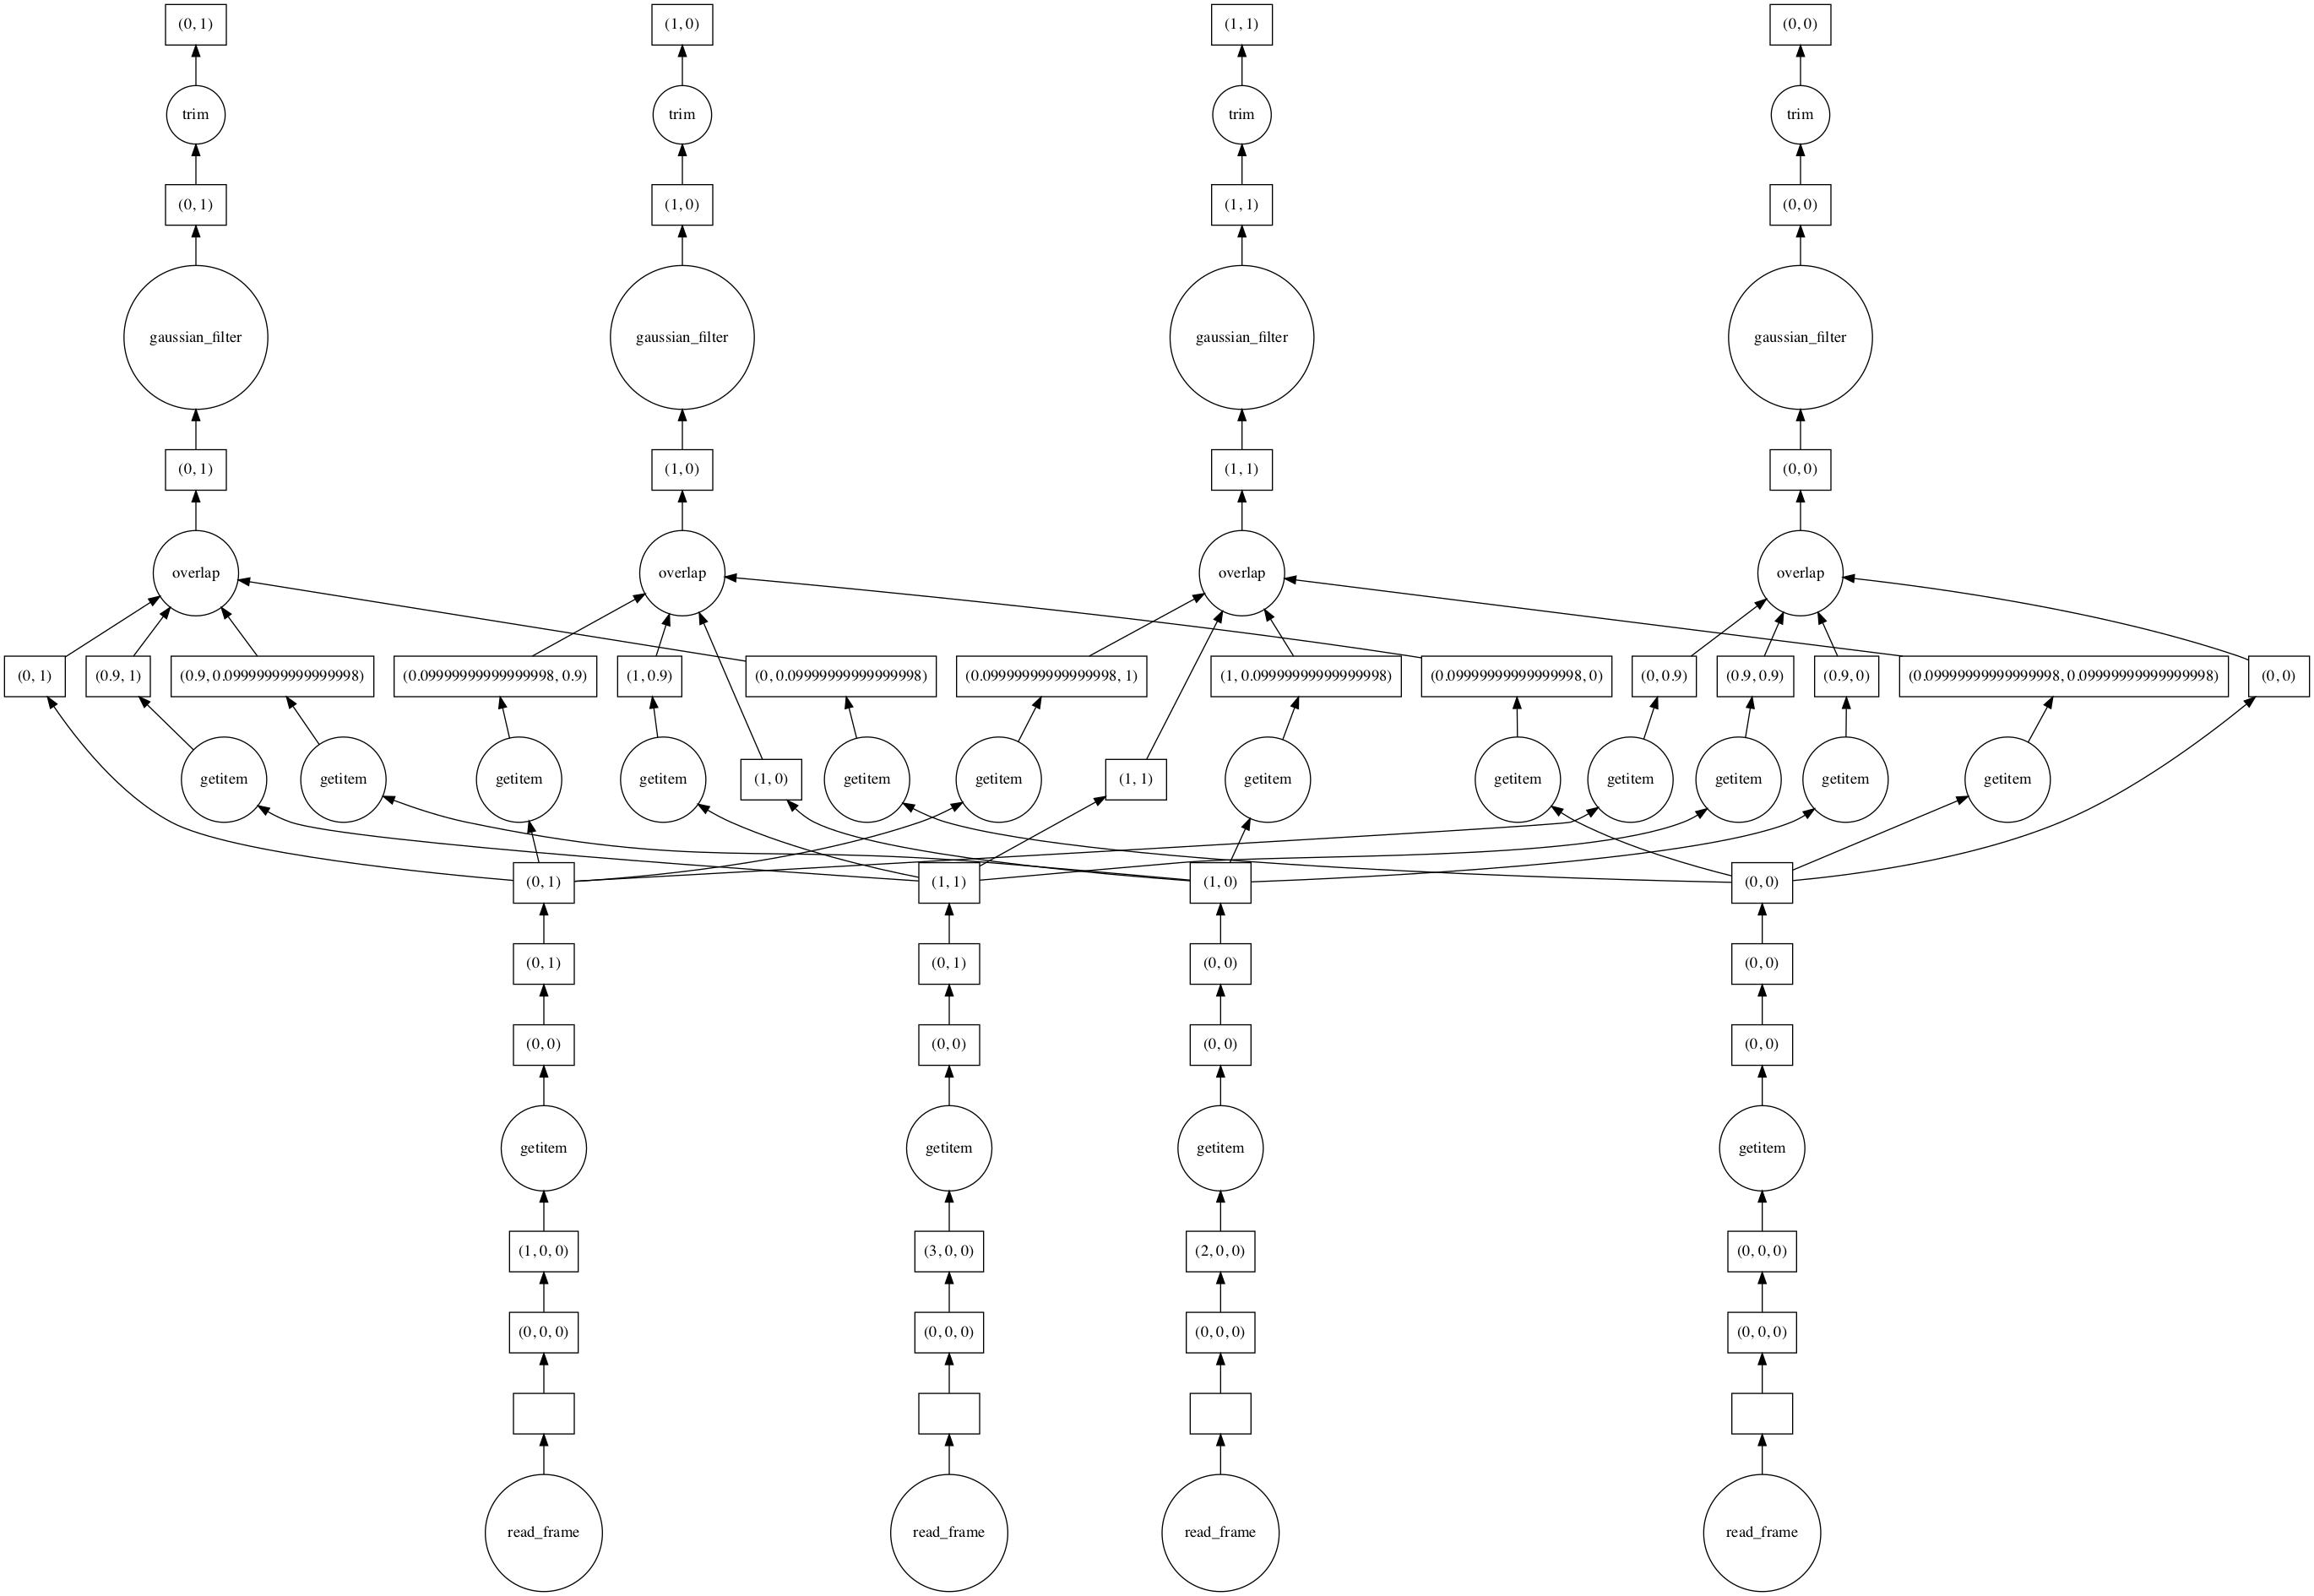

In [43]:
gray_imgs_gauss.visualize()

In [45]:
result = gray_imgs_gauss.compute()

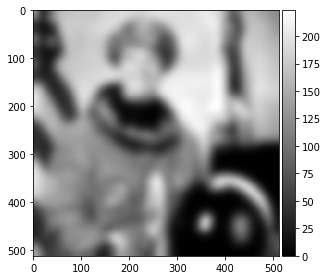

In [47]:
io.imshow(result, cmap='gray')

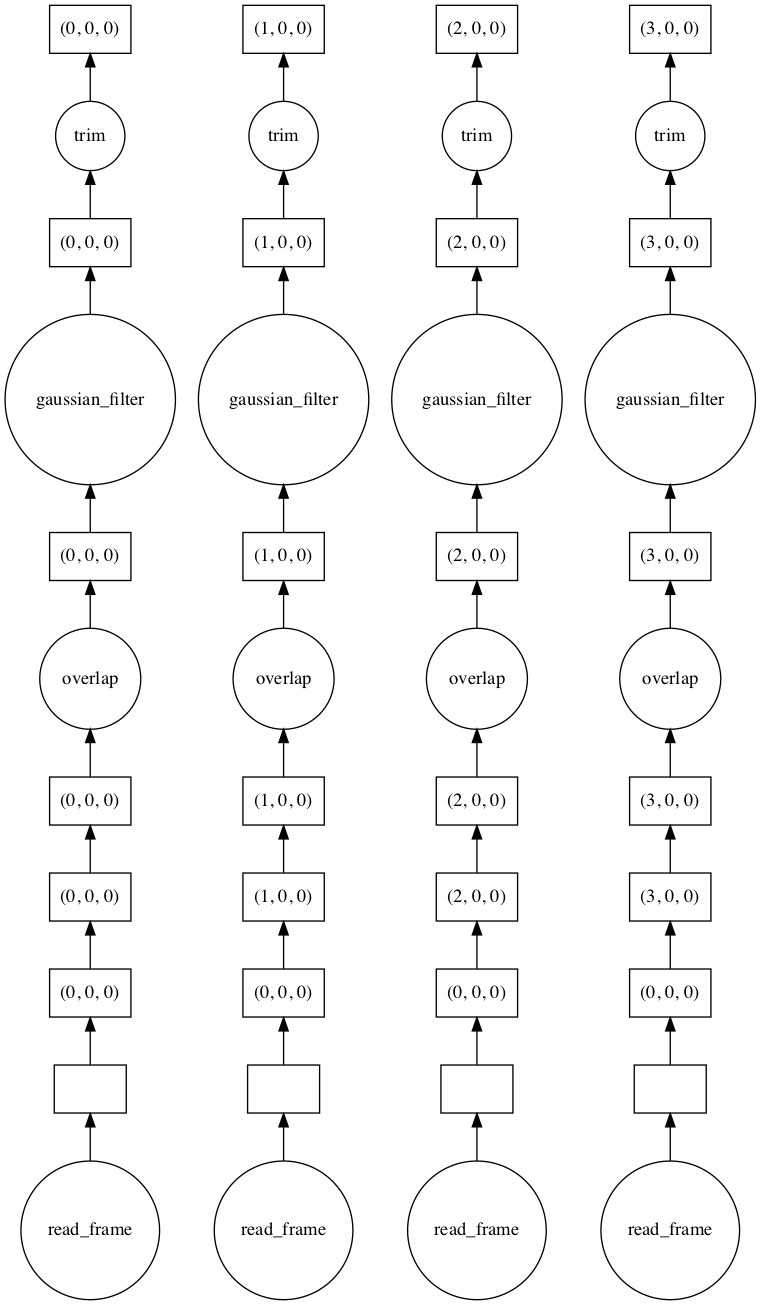

In [50]:
gray_imgs_gauss_4 = dask_image.ndfilters.gaussian_filter(gray_imgs, sigma=[0, 10, 10])
gray_imgs_gauss_4.visualize()

In [52]:
gray_imgs_gauss_4.compute()

array([[[126.56080744, 125.77268394, 124.21381917, ..., 196.82858466,
         196.9404123 , 196.99658842],
        [126.36759569, 125.58115618, 124.02563427, ..., 196.66784931,
         196.77876035, 196.83447355],
        [125.97728314, 125.19422987, 123.64542935, ..., 196.3455585 ,
         196.45461047, 196.5093848 ],
        ...,
        [ 43.6945741 ,  43.85274772,  44.17049429, ...,  24.06953303,
          23.8203727 ,  23.69451717],
        [ 43.45111197,  43.60589629,  43.91693101, ...,  24.42456184,
          24.17189724,  24.04427562],
        [ 43.33002663,  43.48310619,  43.79076464, ...,  24.60404357,
          24.34960735,  24.22109289]],

       [[199.74346215, 199.7216244 , 199.67835867, ..., 121.72035758,
         121.62763451, 121.5811153 ],
        [199.65540866, 199.63395688, 199.59145526, ..., 121.74589744,
         121.65267214, 121.6059007 ],
        [199.47692083, 199.45625049, 199.41529605, ..., 121.79703458,
         121.70280855, 121.65553451],
        ...,


In [53]:
gray_imgs_gauss_4.shape

(4, 256, 256)

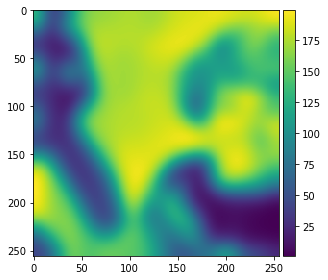

In [54]:
io.imshow(gray_imgs_gauss_4[0, ...])

In [55]:
result.shape

(512, 512)

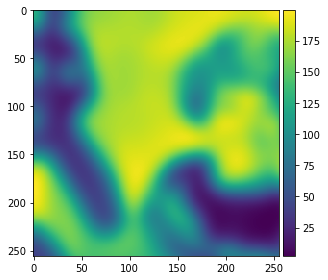

In [56]:
io.imshow(result[:256, :256])

In [62]:
arr = result[:256, :256] - gray_imgs_gauss_4[0,...]


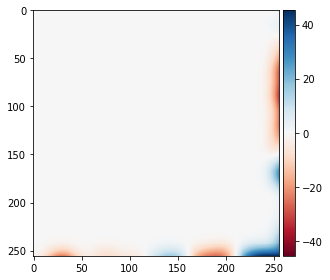

In [64]:
io.imshow(arr)